# **Airbnb Pricing Prediction using Machine Learning**

### Project Overview

- This project focuses on predicting **Airbnb listing prices** by applying multiple **machine learning models** and performing extensive **feature engineering** to enhance predictive performance.
- The dataset includes key **categorical and numerical attributes** such as **room type**, **neighbourhood group**, **availability**, **review scores**, and **host/booking characteristics** that influence pricing.
- Advanced **feature engineering techniques** were used, including ratio features (e.g., price per minimum night), booking and host verification flags, log transformations, and property age calculations.
- A **correlation matrix** was generated to assess the strength of relationships between features and the target variable, helping to refine model inputs.
- Final models trained include **Random Forest**, **XGBoost**, and **LightGBM**, and they were evaluated using **Root Mean Squared Error (RMSE)** and **R-squared (R²)** metrics.
- Among the models tested, **Random Forest** achieved the best performance after hyperparameter tuning and careful feature selection.

---

### Data Source

- The dataset consists of **Airbnb listings data** for U.S.-based properties and includes **property characteristics**, **host-related metadata**, **availability metrics**, and **review statistics**.
- It contains important columns such as `room_type`, `minimum_nights`, `number_of_reviews`, `host_identity_verified`, and `cancellation_policy`, along with `price` as the target.
- The data required preprocessing to remove columns with high NA counts, transform monetary values, and encode categorical variables into model-ready formats.

---

### Key Steps:

#### 1. **Data Cleaning**:
- Removed rows and columns with excessive missing values.
- Converted `price` from string to float and ensured all numeric variables were properly typed.
- Dropped unnecessary identifier columns and filled remaining missing values using median or mode imputation.

#### 2. **Feature Engineering**:
- Created log-transformed versions of skewed numerical features such as `minimum_nights` and `number_of_reviews`.
- Engineered interaction terms and ratios such as `price_per_minimum_night`, `availability_ratio`, and `reviews_per_available_day`.
- Added binary flags for `is_entire_home`, `is_private_room`, and host-related behaviors.
- Computed `property_age` and aggregated group statistics by `neighbourhood group`.

#### 3. **Exploratory Data Analysis**:
- Explored pricing distribution, room type effects, and availability trends through visualizations.
- Used a **correlation matrix** to assess the strength of linear relationships among features and the target variable.
- Analyzed categorical features with respect to price and identified high-impact variables.

#### 4. **Model Building and Evaluation**:
- Trained multiple machine learning models including:
  - **Random Forest**
  - **XGBoost**
  - **LightGBM**
- Performance was assessed using **Root Mean Squared Error (RMSE)** and **R-squared (R²)** scores on the test dataset.
- **Random Forest** emerged as the top-performing model with strong accuracy and generalizability.

#### 5. **Model Comparison**:
- Conducted a comparative analysis of all models.
- Visualized performance using RMSE and R² for a clear side-by-side evaluation.
- Identified potential underfitting/overfitting scenarios and opportunities for further feature refinement.

---

### Tools and Libraries Used:

#### • Python Libraries:
- `pandas` for data wrangling and transformation  
- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for data visualization and EDA  
- `scikit-learn`, `xgboost`, and `lightgbm` for modeling and evaluation  

#### • Machine Learning Models:
- Random Forest  
- XGBoost  
- LightGBM  


### **Data Loading**

In [ ]:
# 1. Data Loading
# - File name: Airbnb_Open_Data.csv
import pandas as pd

df = pd.read_csv('Airbnb_Open_Data.csv')
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns")


✅ Loaded dataset with 102599 rows and 26 columns


<ipython-input-97-6f1484ebc5b4>:5: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


### **Data Cleaning**

In [ ]:
# 2. Clean the dataset
# 2.1. Give me the number of NAs per column
na_counts = df.isna().sum()
print("📊 NA counts per column:")
print(na_counts)

# 2.2. Remove any full‑NA rows and columns
df = df.dropna(axis=0, how='all')
df = df.dropna(axis=1, how='all')

# 2.3. Build a table of NA counts and percentages
total_rows = len(df)
na_table = pd.DataFrame({
    'NA_Count': df.isna().sum(),
    'NA_Percent': df.isna().sum() / total_rows * 100
})
print("\n📋 NA summary table:")
print(na_table)

# 2.4. Drop columns with > 5% NAs
cols_to_drop = na_table[na_table['NA_Percent'] > 5].index
df = df.drop(columns=cols_to_drop)
print(f"\n🗑️  Dropped columns (>5% NAs): {list(cols_to_drop)}")

# 2.5. For remaining columns (≤ 5% NAs), remove all rows containing NAs
df_clean = df.dropna()
print(f"\n🔍 Final cleaned dataset shape: {df_clean.shape}")


📊 NA counts per column:
id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                 

### **Split**

In [ ]:
# 3. Two tables from the cleaned dataset
# 3.1. Numerical columns only
# 3.2. Categorical columns only
from IPython.display import display

df_numeric = df_clean.select_dtypes(include=['number'])
df_categorical = df_clean.select_dtypes(include=['object', 'category'])

print("🔢 Numerical columns (first 5 rows):")
display(df_numeric.head())

print("\n🔤 Categorical columns (first 5 rows):")
display(df_categorical.head())


🔢 Numerical columns (first 5 rows):


,id,host id,lat,long,Construction year,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,40.64749,-73.97237,2020.0,10.0,9.0,4.0,6.0,286.0
1,1002102,52335172823,40.75362,-73.98377,2007.0,30.0,45.0,4.0,2.0,228.0
4,1003689,92037596077,40.79851,-73.94399,2009.0,10.0,9.0,3.0,1.0,289.0
5,1004098,45498551794,40.74767,-73.97500,2013.0,3.0,74.0,3.0,1.0,374.0
7,1005202,90821839709,40.68688,-73.95596,2009.0,45.0,49.0,5.0,1.0,219.0



🔤 Categorical columns (first 5 rows):


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,price,service fee
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,United States,US,False,strict,Private room,$966,$193
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,$142,$28
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,$204,$41
5,Large Cozy 1 BR Apartment In Midtown East,verified,Michelle,Manhattan,Murray Hill,United States,US,True,flexible,Entire home/apt,$577,$115
7,BlissArtsSpace!,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,United States,US,False,moderate,Private room,"$1,060",$212


### **Drop redundant columns**

In [ ]:
# 4. Drop the following columns
# - id, host id, lat, long, Name, host name, country code
drop_cols = ['id', 'host id', 'lat', 'long', 'NAME', 'host name', 'service fee','country code', 'country', 'neighbourhood']
df_clean = df_clean.drop(columns=drop_cols)
print(f"🗑️  Dropped columns: {drop_cols}")
print(f"📐  Updated df_clean shape: {df_clean.shape}")
df = df_clean

🗑️  Dropped columns: ['id', 'host id', 'lat', 'long', 'NAME', 'host name', 'service fee', 'country code', 'country', 'neighbourhood']
📐  Updated df_clean shape: (99032, 12)


### **Feature Engineering**

In [ ]:
# 5. Feature Engineering on df (in-place)
import numpy as np
import pandas as pd
from datetime import datetime
from pandas.api import types as ptypes

# 5.0 Capture original columns
original_cols = df.columns.tolist()

# 5.1 Ensure numeric columns have the proper dtype
num_cols = [
    'price', 'minimum nights', 'number of reviews',
    'review rate number', 'calculated host listings count',
    'availability 365', 'Construction year'
]
for col in num_cols:
    df[col] = (
        df[col]
        .astype(str)
        .replace(r'[\$,]', '', regex=True)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5.2 Impute missing numeric values
df['number of reviews'] = df['number of reviews'].fillna(0)
df['review rate number'] = df['review rate number'].fillna(0)
df['availability 365'] = df['availability 365'].fillna(0)
df['minimum nights'] = df['minimum nights'].fillna(df['minimum nights'].median())
df['price'] = df['price'].fillna(df['price'].median())
df['calculated host listings count'] = df['calculated host listings count'].fillna(0)
df['Construction year'] = df['Construction year'].fillna(df['Construction year'].mode()[0])

# 5.3 Handle infinities and NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# 5.4 Log-transform skewed numeric features
for col in ['minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count', 'price']:
    df[f"{col.replace(' ', '_')}_log"] = np.log1p(df[col].clip(lower=0))

# 5.5 Ratio and interaction features
df['availability_ratio'] = df['availability 365'] / 365
df['reviews_per_available_day'] = df['number of reviews'] / (df['availability 365'] + 1)

# 5.6 Property age features
current_year = datetime.now().year
df['property_age'] = current_year - df['Construction year']
df['is_new_property'] = (df['property_age'] < 5).astype(int)

# 5.7 Host and booking-related flags
df['host_verified_flag'] = (df['host_identity_verified'] == 'verified').astype(int)
df['instant_bookable_flag'] = df['instant_bookable'].astype(int)
cp_map = {'flexible': 1, 'moderate': 2, 'strict': 3}
df['cancellation_policy_score'] = df['cancellation_policy'].map(cp_map).fillna(0).astype(int)

# 5.8 Room-type indicator flags
df['is_entire_home'] = (df['room type'] == 'Entire home/apt').astype(int)
df['is_private_room'] = (df['room type'] == 'Private room').astype(int)
df['is_shared_room'] = (df['room type'] == 'Shared room').astype(int)

# 5.9 Neighborhood-group aggregates
df['group_listing_count'] = df.groupby('neighbourhood group')['neighbourhood group'].transform('count')

# 5.10 High availability and high review rate flags
df['is_high_availability'] = (df['availability 365'] > df['availability 365'].median()).astype(int)
df['is_high_review_rate'] = (df['review rate number'] > df['review rate number'].median()).astype(int)

# 5.11 Novel Feature Engineering
df['neighborhood_price_median'] = df.groupby('neighbourhood group')['price'].transform('median')
df['price_momentum'] = df['price'] / (df['neighborhood_price_median'] + 1)

df['host_confidence_score'] = (
    df.get('host_verified_flag', 0) +
    df.get('instant_bookable_flag', 0) +
    (3 - df.get('cancellation_policy_score', 1))
)

df['review_to_age_ratio'] = df['number of reviews'] / (df['property_age'] + 1)

df['premium_review_indicator'] = np.where(
    (df['review rate number'] >= 4.5) & (df['number of reviews'] < df['number of reviews'].quantile(0.25)), 1, 0
)

price_std = df.groupby('neighbourhood group')['price'].transform('std').fillna(0)
reviews_std = df.groupby('neighbourhood group')['number of reviews'].transform('std').fillna(0)
df['neighborhood_competitiveness'] = (price_std + reviews_std) / 2

df['high_end_booking'] = np.where(
    (df['price'] > df['price'].quantile(0.75)) &
    (df['cancellation_policy_score'] == 3),
    1, 0
)

availability_norm = 1 - df['availability_ratio']
review_norm = df['reviews_per_available_day'] / (df['reviews_per_available_day'].max() + 1)
df['urgency_factor'] = availability_norm * review_norm

# 5.12 Identify and list all newly added features
new_features = [c for c in df.columns if c not in original_cols]

numeric_new = [c for c in new_features if ptypes.is_numeric_dtype(df[c])]
categorical_new = [c for c in new_features if not ptypes.is_numeric_dtype(df[c])]

print(f"Added {len(new_features)} new features:")
print(new_features, "\n")

print("Numeric new features:")
for c in numeric_new:
    print(f"  - {c}")

print("\nCategorical new features:")
for c in categorical_new:
    print(f"  - {c}")


Added 8 new features:
['neighborhood_price_median', 'price_momentum', 'host_confidence_score', 'review_to_age_ratio', 'premium_review_indicator', 'neighborhood_competitiveness', 'high_end_booking', 'urgency_factor'] 

Numeric new features:
  - neighborhood_price_median
  - price_momentum
  - host_confidence_score
  - review_to_age_ratio
  - premium_review_indicator
  - neighborhood_competitiveness
  - high_end_booking
  - urgency_factor

Categorical new features:


###  **Dummy variables for all the categorical columns**

In [ ]:
# 6. Create dummy variables for all categorical columns in df (excluding target 'price')
import pandas as pd

# 6.1 Ensure 'price' is numeric
if df['price'].dtype == object:
    df['price'] = (
        df['price']
        .replace(r'[\$,]', '', regex=True)
        .str.strip()
        .astype(float)
    )

# 6.2 Split into features and target
X = df.drop(columns=['price'])
y = df['price']

# 6.3 Identify categorical feature columns
cat_cols = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# 6.4 One‑hot‑encode those categorical features
X_encoded = pd.get_dummies(
    X,
    columns=cat_cols,
    prefix_sep='_',
    drop_first=False,
    dummy_na=False
)

# 6.5 Re‑attach the target and assign to df_final
df_final = pd.concat([X_encoded, y], axis=1)
print(f"✅ Step 6 complete: df_final has {df_final.shape[1]} columns")

# 7. List the number of dummy columns created per original categorical column
# 7.1 Compute dummy_counts
dummy_counts = {
    col: len([c for c in df_final.columns if c.startswith(f"{col}_")])
    for col in cat_cols
}

# 7.2 Print summary
print("\n📊 Step 7: Number of dummy columns per original categorical column:")
for col, count in dummy_counts.items():
    print(f"  - {col}: {count}")


✅ Step 6 complete: df_final has 50 columns

📊 Step 7: Number of dummy columns per original categorical column:
  - host_identity_verified: 2
  - neighbourhood group: 6
  - instant_bookable: 3
  - cancellation_policy: 4
  - room type: 4


In [ ]:
# Drop the 'price_log' column if it exists
if 'price_log' in df_final.columns:
    df_final.drop(columns=['price_log'], inplace=True)
    print("Dropped 'price_log' from df_final")

# List all columns in df_final as a table
import pandas as pd
from IPython.display import display

cols_df = pd.DataFrame({'Column Name': df_final.columns})
display(cols_df)

Dropped 'price_log' from df_final


,Column Name
0,Construction year
1,minimum nights
2,number of reviews
3,review rate number
4,calculated host listings count
5,availability 365
6,minimum_nights_log
7,number_of_reviews_log
8,review_rate_number_log
9,calculated_host_listings_count_log


In [ ]:
df_final

,Construction year,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,minimum_nights_log,number_of_reviews_log,review_rate_number_log,calculated_host_listings_count_log,...,instant_bookable_False,instant_bookable_True,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room type_Entire home/apt,room type_Hotel room,room type_Private room,room type_Shared room,price
0,2020.0,10.0,9.0,4.0,6.0,286.0,2.397895,2.302585,1.609438,1.945910,...,True,False,False,False,True,False,False,True,False,966
1,2007.0,30.0,45.0,4.0,2.0,228.0,3.433987,3.828641,1.609438,1.098612,...,True,False,False,True,False,True,False,False,False,142
4,2009.0,10.0,9.0,3.0,1.0,289.0,2.397895,2.302585,1.386294,0.693147,...,True,False,False,True,False,True,False,False,False,204
5,2013.0,3.0,74.0,3.0,1.0,374.0,1.386294,4.317488,1.386294,0.693147,...,False,True,True,False,False,True,False,False,False,577
7,2009.0,45.0,49.0,5.0,1.0,219.0,3.828641,3.912023,1.791759,0.693147,...,True,False,False,True,False,False,False,True,False,1060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,2003.0,1.0,0.0,3.0,1.0,227.0,0.693147,0.000000,1.386294,0.693147,...,True,False,True,False,False,False,False,True,False,844
102595,2016.0,1.0,1.0,2.0,2.0,395.0,0.693147,0.693147,1.098612,1.098612,...,False,True,False,True,False,False,False,True,False,837
102596,2009.0,3.0,0.0,5.0,1.0,342.0,1.386294,0.000000,1.791759,0.693147,...,False,True,False,True,False,False,False,True,False,988
102597,2015.0,2.0,5.0,3.0,1.0,386.0,1.098612,1.791759,1.386294,0.693147,...,False,True,False,False,True,True,False,False,False,546


### **EDA**

Columns in df_clean: ['host_identity_verified', 'neighbourhood group', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count', 'availability 365', 'minimum_nights_log', 'number_of_reviews_log', 'review_rate_number_log', 'calculated_host_listings_count_log', 'price_log', 'availability_ratio', 'reviews_per_available_day', 'property_age', 'is_new_property', 'host_verified_flag', 'instant_bookable_flag', 'cancellation_policy_score', 'is_entire_home', 'is_private_room', 'is_shared_room', 'group_listing_count', 'is_high_availability', 'is_high_review_rate', 'neighborhood_price_median', 'price_momentum', 'host_confidence_score', 'review_to_age_ratio', 'premium_review_indicator', 'neighborhood_competitiveness', 'high_end_booking', 'urgency_factor'] 

Descriptive statistics (numeric features):
        Construction year         price  minimum nights  number of reviews  \
c

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


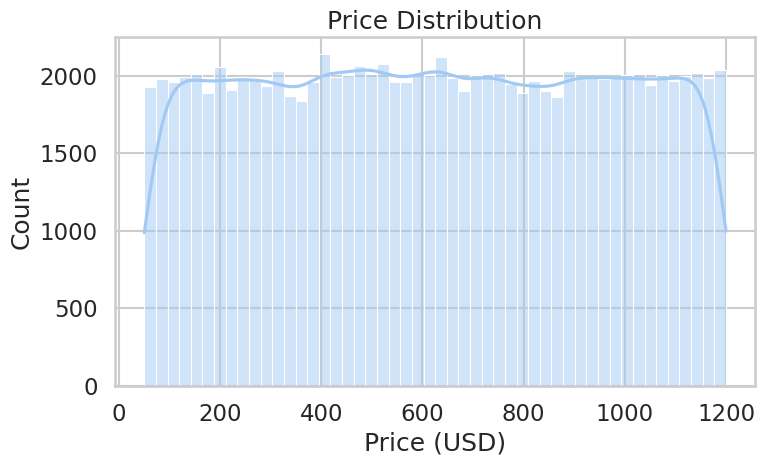

95th percentile: $1143.00
99th percentile: $1188.00

--- host_identity_verified value counts ---
host_identity_verified
unconfirmed    49528
verified       49504
Name: count, dtype: int64 



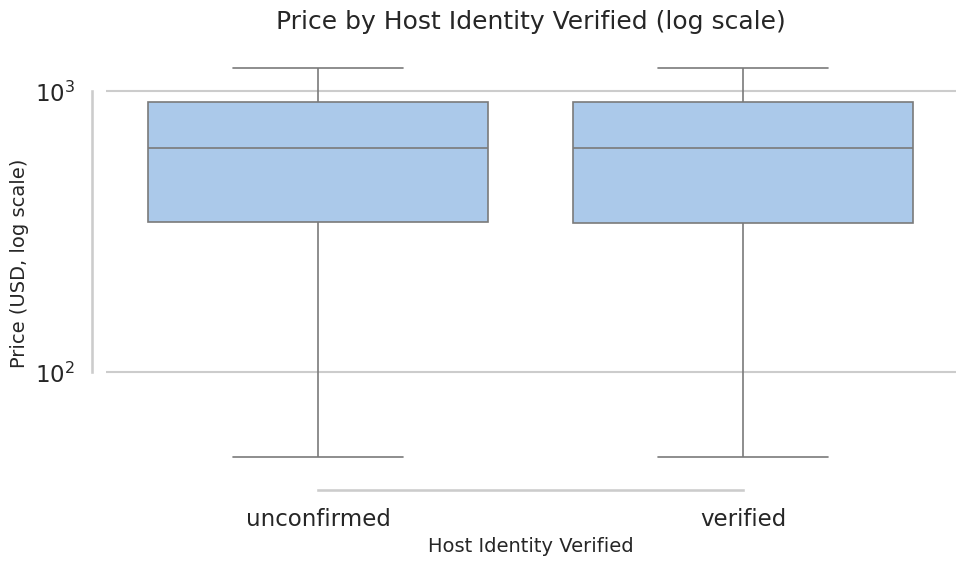

--- neighbourhood group value counts ---
neighbourhood group
Manhattan        42252
Brooklyn         40416
Queens           12834
Bronx             2608
Staten Island      921
brookln              1
Name: count, dtype: int64 



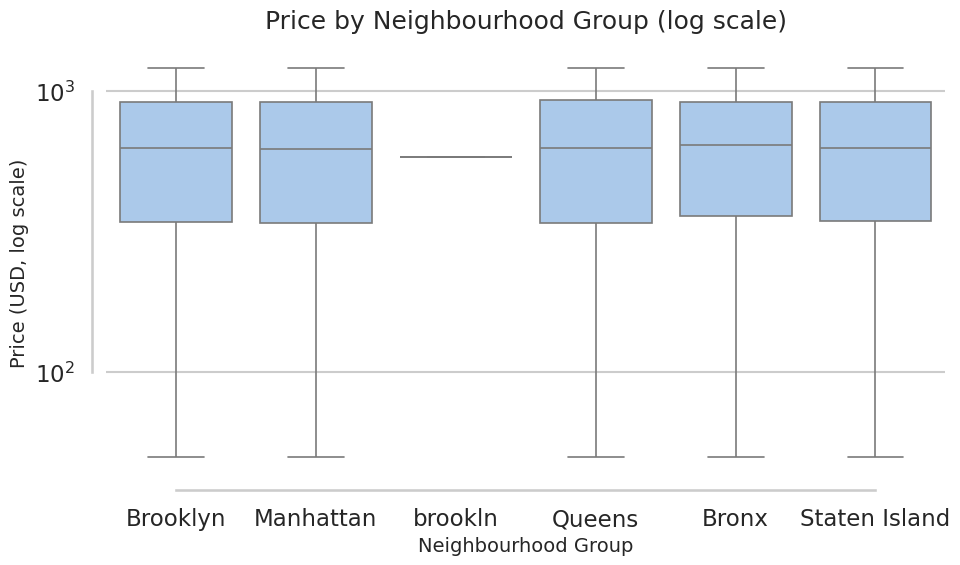

--- cancellation_policy value counts ---
cancellation_policy
moderate    33188
strict      32956
flexible    32888
Name: count, dtype: int64 



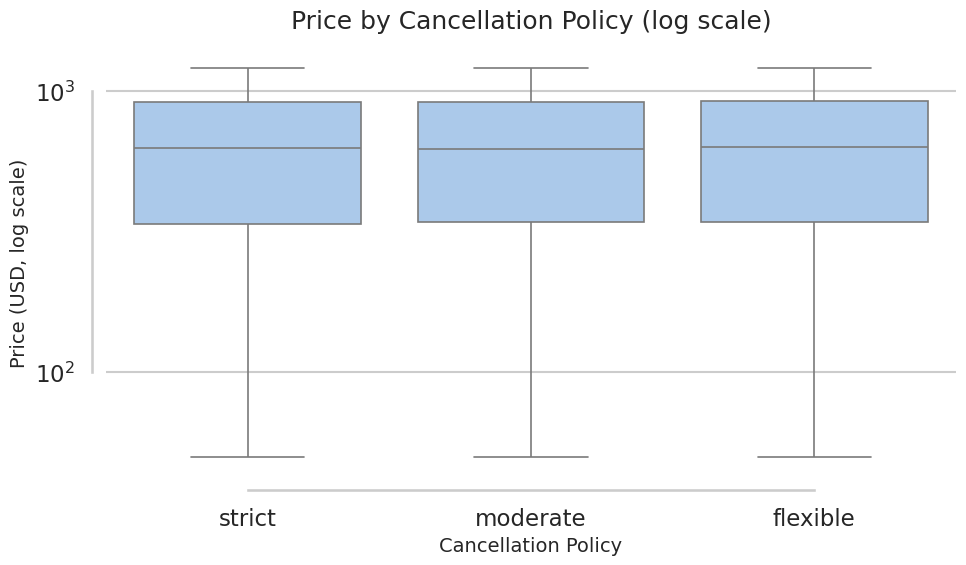

--- room type value counts ---
room type
Entire home/apt    51904
Private room       44876
Shared room         2143
Hotel room           109
Name: count, dtype: int64 



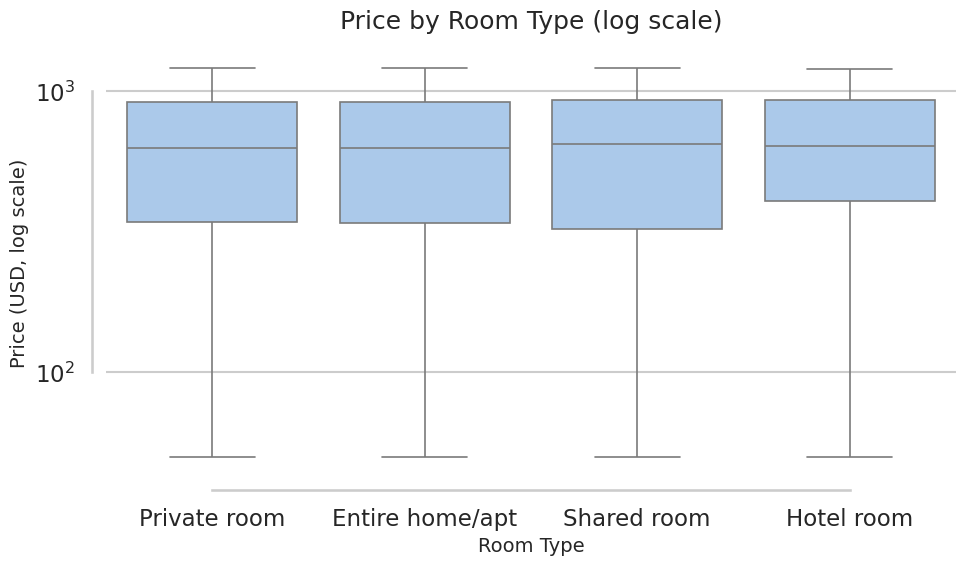

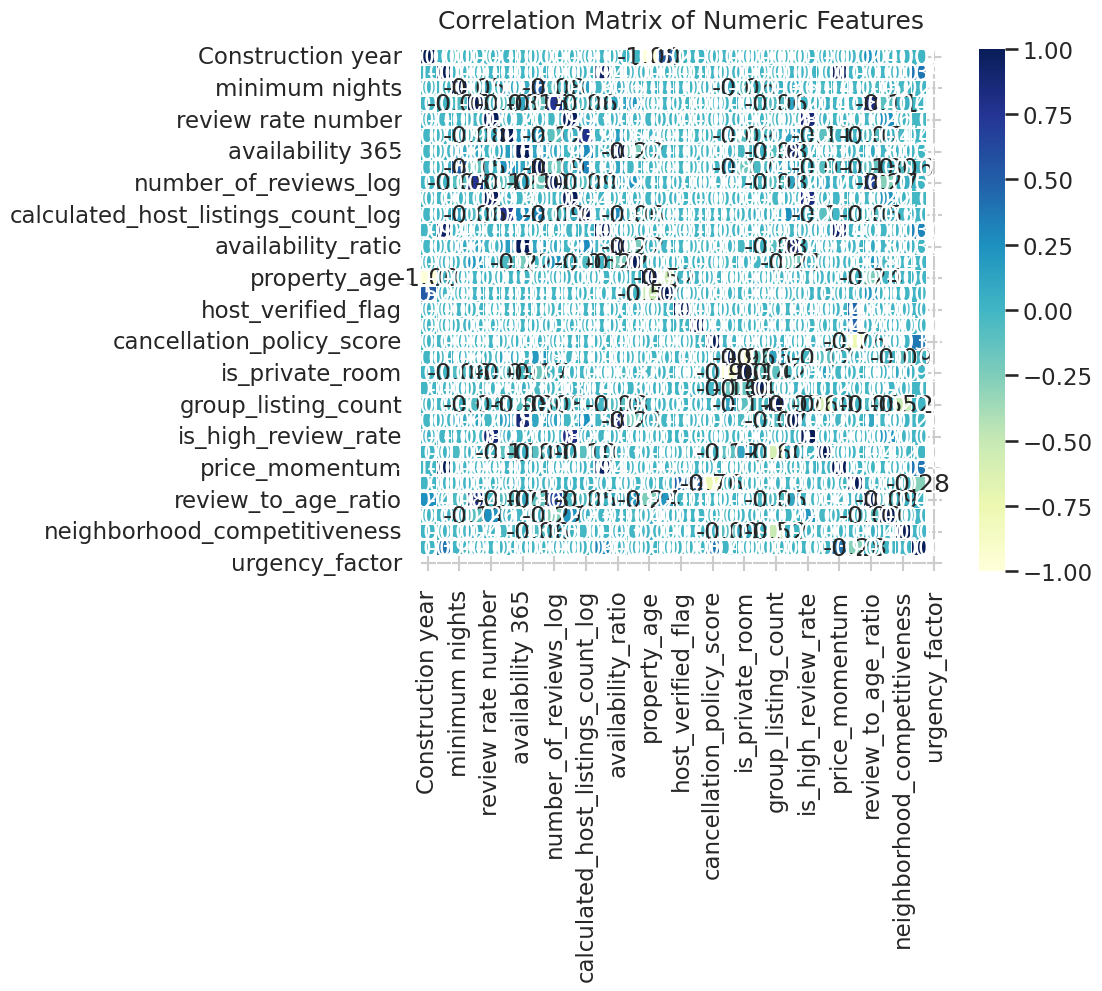

In [ ]:
# 7. Exploratory Data Analysis on df_clean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Presentation‑ready style
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('pastel')

# 7.0. Inspect columns
print("Columns in df_clean:", df_clean.columns.tolist(), "\n")

# 7.1. Descriptive statistics for numeric features
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print("Descriptive statistics (numeric features):\n", df_clean[num_cols].describe(), "\n")

# 7.2. Price distribution & outlier quantiles
plt.figure(figsize=(8,5))
sns.histplot(df_clean['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print(f"95th percentile: ${df_clean['price'].quantile(0.95):.2f}")
print(f"99th percentile: ${df_clean['price'].quantile(0.99):.2f}\n")

# 7.3. Categorical feature analysis with enhanced boxplots
cat_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    print(f"--- {col} value counts ---")
    print(df_clean[col].value_counts(), "\n")
    plt.figure(figsize=(10,6))
    ax = sns.boxplot(
        x=col, y='price', data=df_clean,
        showfliers=True, fliersize=4, linewidth=1.2
    )
    # Add transparency to boxes
    for patch in ax.artists:
        r, g, b, _ = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.6))
    ax.set_yscale('log')
    ax.set_title(f'Price by {col.replace("_"," ").title()} (log scale)', fontsize=18, pad=15)
    ax.set_xlabel(col.replace('_',' ').title(), fontsize=14)
    ax.set_ylabel('Price (USD, log scale)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    sns.despine(offset=10, trim=True)
    plt.tight_layout()
    plt.show()

# 7.4. Price vs. Availability
if 'availability_365' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='price', y='availability_365', data=df_clean, alpha=0.4)
    plt.title('Price vs Availability (days/year)')
    plt.xlabel('Price (USD)')
    plt.ylabel('Availability (365 days)')
    plt.tight_layout()
    plt.show()
    print("Correlation (price, availability_365):",
          df_clean['price'].corr(df_clean['availability_365']), "\n")

# 7.5. Price vs. Reviews per Month
if 'reviews_per_month' in df_clean.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='price', y='reviews_per_month', data=df_clean, alpha=0.4)
    plt.title('Price vs Reviews per Month')
    plt.xlabel('Price (USD)')
    plt.ylabel('Reviews per Month')
    plt.tight_layout()
    plt.show()
    print("Correlation (price, reviews_per_month):",
          df_clean['price'].corr(df_clean['reviews_per_month']), "\n")

# 7.6. Correlation matrix of all numeric features
plt.figure(figsize=(12,10))
corr = df_clean[num_cols].corr()
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="YlGnBu", square=True, linewidths=0.5
)
plt.title('Correlation Matrix of Numeric Features', fontsize=18, pad=15)
plt.tight_layout()
plt.show()

# Later

### **Random Forest**

In [ ]:
# 8. Random Forest Training and Evaluation on df_final
# -- Automatically detect and drop any remaining leakage features

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 8.1 Separate features and target
X = df_final.drop(columns=['price'])
y = df_final['price']

# 8.1.1 Clean infinite values and fill NaNs
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

# 8.2 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 8.3 Instantiate and fit the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 8.4 Predict and evaluate
y_pred = rf.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print("--- Random Forest Regression Results")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


--- Random Forest Regression Results
RMSE: 0.17
R²:   1.00


### **Feature Importance Curve**

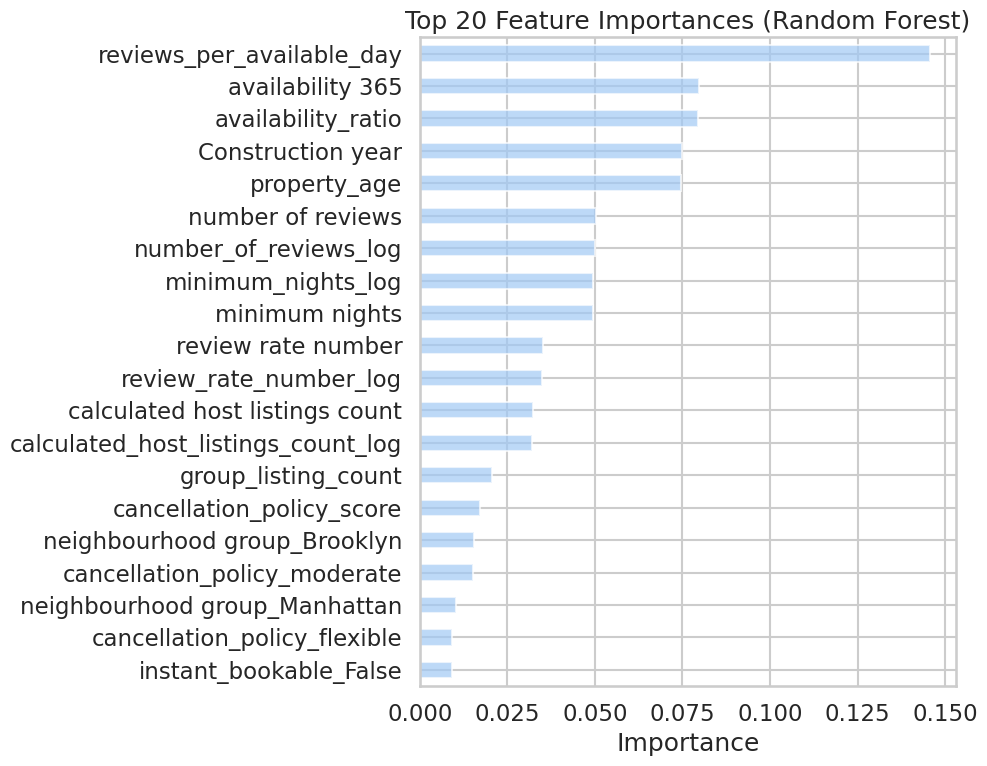

In [ ]:
# 11. Feature Importance Plot for Random Forest
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 11.1 Prepare features and target
X = df_final.drop(columns=['price'])
y = df_final['price']

# 11.2 Handle infinities and missing values
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

# 11.3 Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# 11.4 Extract and sort feature importances
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# 11.5 Plot top 20 feature importances
plt.figure(figsize=(10, 8))
feat_imp.head(20)[::-1].plot(kind='barh', alpha=0.7)
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


### **Comprehensive analysis**

In [ ]:
# 10. Comprehensive Comparison: RandomForest, XGBoost, LightGBM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 10.1 Prepare features and target from df_final
X = df_final.drop(columns=['price'])
y = df_final['price']

# 10.2 Clean infinite values and fill NaNs
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

# 10.3 Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# 10.4 Define models
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost':      XGBRegressor(
                        objective='reg:squarederror',
                        n_estimators=150,
                        learning_rate=0.1,
                        max_depth=6,
                        random_state=42
                    ),
    'LightGBM':     LGBMRegressor(
                        n_estimators=200,
                        learning_rate=0.05,
                        max_depth=8,
                        random_state=42
                    )
}

# 10.5 Train each model, predict & collect metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse   = mean_squared_error(y_test, preds)
    rmse  = np.sqrt(mse)
    r2    = r2_score(y_test, preds)
    results[name] = {'RMSE': rmse, 'R2': r2}

# 10.6 Display results
results_df = pd.DataFrame(results).T
print("🔍 Step 10 — Model Comparison Results:")
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1716
[LightGBM] [Info] Number of data points in the train set: 79225, number of used features: 39
[LightGBM] [Info] Start training from score 625.115204
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
🔍 Step 10 — Model Comparison Results:
                    RMSE